In [5]:
import numpy as np
import numpy.linalg as lg
import matplotlib.pyplot as plt
import colorcet as cc
import math
from scipy.optimize import fmin

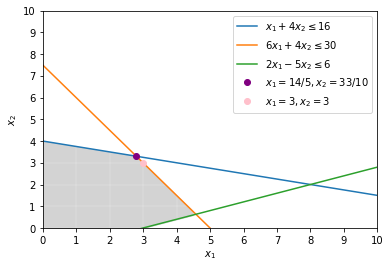

In [12]:
# a) Plotting feasible set
x = np.linspace(0,20,1000)
fig, ax = plt.subplots()

# Equations:
# We isolate wrt. x_2 since this acts as y axis
# eq1
eq1 = (16.0 - x)/4.0
ax.plot(x,eq1, label=r'$x_1+4x_2\leq 16$')

# eq2
eq2 = (30 - 6*x)/4.0
ax.plot(x,eq2, label=r'$6x_1+4x_2\leq 30$')

# eq3
# plt.axvline(6, color='red', label=r'$x_1 \leq 6$')
eq3 = (2*x - 6)/5.0
ax.plot(x,eq3, label=r'$2x_1-5x_2\leq 6$')


# level set
# level = 1 - 2*x
# ax.plot(x,level, label=r'$f(x_1,x_2)=1$')

# Plotting:
# Axis



plt.xlim([0,10])
plt.ylim([0,10])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end+1, 1))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end+1, 1))
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

# Filling feasible region
min1 = np.minimum(eq1,eq2)
plt.fill_between(x,min1,eq3, where = x<=4.5, color = 'lightgray')
plt.legend()
plt.savefig('./ex1a.png', dpi=300)

# b) Plotting solution
plt.plot(14/5.0,33/10.0,'ro', color = 'purple', label = r'$x_1 = 14/5, x_2 = 33/10$')

plt.legend()
plt.savefig('./ex1b.png', dpi=600, figsize=(12, 12))

# d) Integer solution
plt.grid(color='white', linestyle='-', linewidth=.2)
plt.plot(3,3,'ro', color = 'pink', label = r'$x_1 = 3, x_2 = 3$')

plt.legend()
plt.savefig('./ex1c.png', dpi=600, figsize=(12, 12))

In [ ]:
## Generate a contour plot
# Import some other libraries that we'll need
# matplotlib and numpy packages must also be installed
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# define objective function
def f(x):
    x1 = x[0]
    x2 = x[1]
    obj = x1**2 - 2.0 * x1 * x2 + 4 * x2**2
    return obj

# define objective gradient
def dfdx(x):
    x1 = x[0]
    x2 = x[1]
    grad = []
    grad.append(2.0 * x1 - 2.0 * x2)
    grad.append(-2.0 * x1 + 8.0 * x2)
    return grad

# Exact 2nd derivatives (hessian)
H = [[2.0, -2.0],[-2.0, 8.0]]

# Start location
x_start = [-3.0, 2.0]

# Design variables at mesh points
i1 = np.arange(-4.0, 4.0, 0.1)
i2 = np.arange(-4.0, 4.0, 0.1)
x1_mesh, x2_mesh = np.meshgrid(i1, i2)
f_mesh = x1_mesh**2 - 2.0 * x1_mesh * x2_mesh + 4 * x2_mesh**2

# Create a contour plot
plt.figure()
# Specify contour lines
lines = range(2,52,2)
# Plot contours
CS = plt.contour(x1_mesh, x2_mesh, f_mesh,lines)
# Label contours
plt.clabel(CS, inline=1, fontsize=10)
# Add some text to the plot
plt.title('f(x) = x1^2 - 2*x1*x2 + 4*x2^2')
plt.xlabel('x1')
plt.ylabel('x2')
# Show the plot
#plt.show()

##################################################
# Newton's method
##################################################
xn = np.zeros((2,2))
xn[0] = x_start
# Get gradient at start location (df/dx or grad(f))
gn = dfdx(xn[0])
# Compute search direction and magnitude (dx)
#  with dx = -inv(H) * grad
delta_xn = np.empty((1,2))
delta_xn = -np.linalg.solve(H,gn)
xn[1] = xn[0]+delta_xn
plt.plot(xn[:,0],xn[:,1],'k-o')

##################################################
# Steepest descent method
##################################################
# Number of iterations
n = 8
# Use this alpha for every line search
alpha = 0.15
# Initialize xs
xs = np.zeros((n+1,2))
xs[0] = x_start
# Get gradient at start location (df/dx or grad(f))
for i in range(n):
    gs = dfdx(xs[i])
    # Compute search direction and magnitude (dx)
    #  with dx = - grad but no line searching
    xs[i+1] = xs[i] - np.dot(alpha,dfdx(xs[i]))
plt.plot(xs[:,0],xs[:,1],'g-o')

##################################################
# Conjugate gradient method
##################################################
# Number of iterations
n = 8
# Use this alpha for the first line search
alpha = 0.15
neg = [[-1.0,0.0],[0.0,-1.0]]
# Initialize xc
xc = np.zeros((n+1,2))
xc[0] = x_start
# Initialize delta_gc
delta_cg = np.zeros((n+1,2))
# Initialize gc
gc = np.zeros((n+1,2))
# Get gradient at start location (df/dx or grad(f))
for i in range(n):
    gc[i] = dfdx(xc[i])
    # Compute search direction and magnitude (dx)
    #  with dx = - grad but no line searching
    if i==0:
        beta = 0
        delta_cg[i] = - np.dot(alpha,dfdx(xc[i]))
    else:
        beta = np.dot(gc[i],gc[i]) / np.dot(gc[i-1],gc[i-1])
        delta_cg[i] = alpha * np.dot(neg,dfdx(xc[i])) + beta * delta_cg[i-1]
    xc[i+1] = xc[i] + delta_cg[i] 
plt.plot(xc[:,0],xc[:,1],'y-o')

##################################################
# Quasi-Newton method
##################################################
# Number of iterations
n = 8
# Use this alpha for every line search
alpha = np.linspace(0.1,1.0,n)
# Initialize delta_xq and gamma
delta_xq = np.zeros((2,1))
gamma = np.zeros((2,1))
part1 = np.zeros((2,2))
part2 = np.zeros((2,2))
part3 = np.zeros((2,2))
part4 = np.zeros((2,2))
part5 = np.zeros((2,2))
part6 = np.zeros((2,1))
part7 = np.zeros((1,1))
part8 = np.zeros((2,2))
part9 = np.zeros((2,2))
# Initialize xq
xq = np.zeros((n+1,2))
xq[0] = x_start
# Initialize gradient storage
g = np.zeros((n+1,2))
g[0] = dfdx(xq[0])
# Initialize hessian storage
h = np.zeros((n+1,2,2))
h[0] = [[1, 0.0],[0.0, 1]]
for i in range(n):
    # Compute search direction and magnitude (dx)
    #  with dx = -alpha * inv(h) * grad
    delta_xq = -np.dot(alpha[i],np.linalg.solve(h[i],g[i]))
    xq[i+1] = xq[i] + delta_xq

    # Get gradient update for next step
    g[i+1] = dfdx(xq[i+1])

    # Get hessian update for next step
    gamma = g[i+1]-g[i]
    part1 = np.outer(gamma,gamma)
    part2 = np.outer(gamma,delta_xq)
    part3 = np.dot(np.linalg.pinv(part2),part1)

    part4 = np.outer(delta_xq,delta_xq)
    part5 = np.dot(h[i],part4)
    part6 = np.dot(part5,h[i])
    part7 = np.dot(delta_xq,h[i])
    part8 = np.dot(part7,delta_xq)
    part9 = np.dot(part6,1/part8)
    
    h[i+1] = h[i] + part3 - part9

plt.plot(xq[:,0],xq[:,1],'r-o')

# Save the figure as a PNG
plt.savefig('contour.png')

plt.show()
